## Work
1. 請建立自己的deep neural network
2. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
3. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [8]:
import os
import keras
from keras.datasets import cifar10
import warnings
warnings.filterwarnings('ignore')

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [9]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = cifar10.load_data()

In [10]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [11]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [12]:
model = build_mlp()

# 用 Keras 內建方法檢視模型各層參數量
model.summary()
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense_4 (Dense)             (None, 512)               1573376   
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1738890 (6.63 MB)
Trainable params: 1738890 (6.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 3s 11ms/step - loss: 2.0716 - accuracy: 0.2654 - val_loss: 1.9400 - val_accuracy: 0.3232
Epoch 2/500
196/196 [==============================] - 2s 8ms/step - loss: 1.8802 - accuracy: 0.3373 - val_loss: 1.9444 - val_accuracy: 0.2970
Epoch 3/500
196/196 [==============================] - 2s 8ms/step - loss: 1.8168 - accuracy: 0.3604 - val_loss: 1.8068 - val_accuracy: 0.3601
Epoch 4/500
196/196 [==============================] - 2s 8ms/step - loss: 1.7701 - accuracy: 0.3787 - val_loss: 1.7956 - val_accuracy: 0.3460
Epoch 5/500
196/196 [==============================] - 2s 8ms/step - loss: 1.7323 - accuracy: 0.3901 - val_loss: 1.7674 - val_accuracy: 0.3714
Epoch 6/500
196/196 [==============================] - 2s 8ms/step - loss: 1.7044 - accuracy: 0.3995 - val_loss: 1.6864 - val_accuracy: 0.4108
Epoch 7/500
196/196 [==============================] - 2s 8ms/step - loss: 1.6783 - accuracy: 0.4103 - val_loss: 1.6784 - val_accuracy: 0.408

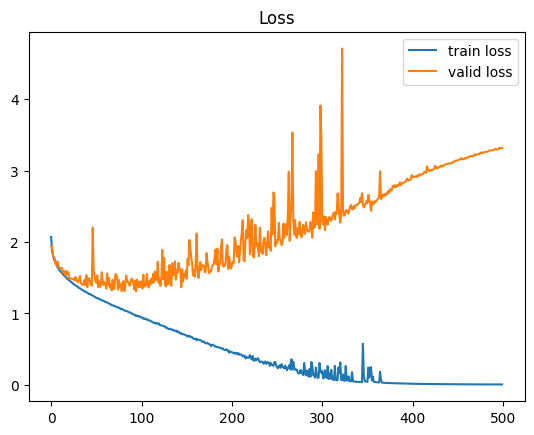

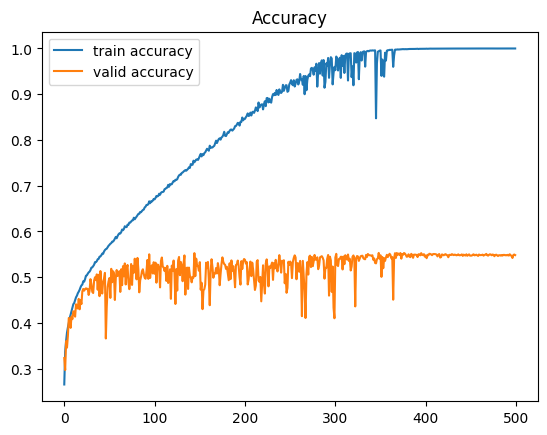

In [14]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()